# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Luthfiyyah Az Zahro]
- **Email:** [fiyyah.zahro@gmail.com]
- **ID Dicoding:** [fifiyyah]

## Menentukan Pertanyaan Bisnis

- Bagaimana distribusi penyewaan sepeda berdasarkan hari dalam satu minggu?
- Pada jam berapa yang paling populer untuk persewaan sepeda?
- Bagaimana perbandingan jumlah  penyewa casual dan registered per bulan dalam setahun terakhir?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Code di atas mengimpor beberapa library yang akan digunakan dalam analisis data dan visualisasi di Python, yaitu NumPy, Pandas, Matplotlib, dan Seaborn. NumPy digunakan untuk komputasi numerik, Pandas untuk manipulasi dan analisis data, Matplotlib untuk membuat visualisasi seperti plot, dan Seaborn untuk visualisasi data yang lebih menarik dan informatif. 

## Data Wrangling

### Gathering Data

In [2]:
day_df = pd.read_csv("data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Code di atas menggunakan library Pandas untuk membaca file CSV yang bernama "day.csv" dan menyimpannya ke dalam sebuah DataFrame yang disebut day_df. DataFrame ini kemudian ditampilkan lima baris pertamanya menggunakan metode head()

In [3]:
hour_df = pd.read_csv("data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Code di atas menggunakan library Pandas untuk membaca file CSV yang bernama "hour.csv" dan menyimpannya ke dalam sebuah DataFrame yang disebut hour_df. DataFrame ini kemudian ditampilkan lima baris pertamanya menggunakan metode head()

### Assessing Data

In [4]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Code di atas digunakan untuk menampilkan struktur data pada DataFrame day_df

In [5]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


Code di atas digunakan untuk menghitung jumlah duplikasi pada DataFrame day_df kemudian menampilkannya

In [6]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Code di atas untuk menampilkan hasil ringkasan statistik deskriptif DataFrame day_df, seperti rata-rata, standar deviasi, nilai minimum, kuartil (25%, 50%, dan 75%), serta nilai maksimum dari setiap kolom numerik dalam DataFrame. 

In [7]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Code di atas digunakan untuk menampilkan struktur data pada DataFrame hour_df

In [8]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


Code di atas digunakan untuk menghitung jumlah duplikasi pada DataFrame hour_df kemudian menampilkannya

In [9]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Code di atas untuk menampilkan hasil ringkasan statistik deskriptif DataFrame hour_df, seperti rata-rata, standar deviasi, nilai minimum, kuartil (25%, 50%, dan 75%), serta nilai maksimum dari setiap kolom numerik dalam DataFrame. 

### Cleaning Data

In [10]:
datetime_columns = ["dteday"]
 
for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])

Code di atas digunakan untuk mengubah tipe data kolom 'dteday' pada Data Frame day_df dari yang sebelumnya object menjadi datetime

In [11]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

Code di atas mengecek kembali apakah tipe data 'dteday' pada DataFrame day_df sudah berubah atau belum

In [12]:
datetime_columns = ["dteday"]
 
for column in datetime_columns:
  hour_df[column] = pd.to_datetime(hour_df[column])

Code di atas digunakan untuk mengubah tipe data kolom 'dteday' pada Data Frame hour_df dari yang sebelumnya object menjadi datetime

In [13]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

Code di atas mengecek kembali apakah tipe data 'dteday' pada DataFrame hour_df sudah berubah atau belum

## Exploratory Data Analysis (EDA)

### Eksplorasi Data day_df

In [14]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


Code di atas untuk menampilkan hasil ringkasan statistik deskriptif DataFrame day_df, seperti rata-rata, standar deviasi, nilai minimum, kuartil (25%, 50%, dan 75%), serta nilai maksimum dari setiap kolom numerik dalam DataFrame. (include="all") digunakan untuk menghasilkan statistik deskriptif untuk semua jenis data dalam DataFrame, termasuk kolom non-numerik seperti tipe data objek 

In [15]:
day_df.groupby(by="weekday").agg({
    "cnt": "sum"
    #"temp": ["max", "min", "mean", "std"]
})

,cnt
weekday,
0,444027
1,455503
2,469109
3,473048
4,485395
5,487790
6,477807


Code di atas digunakan untuk mengelompokkan data berdasarkan nilai pada kolom 'weekday'. Setelah pengelompokan, fungsi agregasi agg() digunakan untuk menghitung jumlah ("sum") dari kolom 'cnt' untuk setiap kelompok 'weekday'.

In [24]:
day_df.groupby(by="mnth").agg({
    "cnt": "sum",
    "casual": "sum",
    "registered": "sum"
})

,cnt,casual,registered
mnth,,,
1,134933,12042,122891
2,151352,14963,136389
3,228920,44444,184476
4,269094,60802,208292
5,331686,75285,256401
6,346342,73906,272436
7,344948,78157,266791
8,351194,72039,279155
9,345991,70323,275668


Code di atas digunakan untuk mengelompokkan data berdasarkan nilai pada kolom 'mnth'. Setelah pengelompokan, fungsi agregasi agg() digunakan untuk menghitung jumlah ("sum") dari kolom 'cnt', 'casual', dan 'registered' untuk setiap kelompok 'mnth'.

### Eksplorasi Data hour_df

In [17]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


Code di atas untuk menampilkan hasil ringkasan statistik deskriptif DataFrame hour_df, seperti rata-rata, standar deviasi, nilai minimum, kuartil (25%, 50%, dan 75%), serta nilai maksimum dari setiap kolom numerik dalam DataFrame. (include="all") digunakan untuk menghasilkan statistik deskriptif untuk semua jenis data dalam DataFrame, termasuk kolom non-numerik seperti tipe data objek 

In [18]:
hour_df.groupby(by="hr").agg({
    "cnt": "sum"
    #"temp": ["max", "min", "mean", "std"]
})

,cnt
hr,
0,39130
1,24164
2,16352
3,8174
4,4428
5,14261
6,55132
7,154171
8,261001


Code di atas digunakan untuk mengelompokkan data berdasarkan nilai pada kolom 'hr'. Setelah pengelompokan, fungsi agregasi agg() digunakan untuk menghitung jumlah ("sum") dari kolom 'cnt' untuk setiap kelompok 'hr'.

In [39]:
day_hour_df = pd.merge(day_df, hour_df, on=["dteday"])
day_hour_df.head()

,instant_x,dteday,season_x,yr_x,mnth_x,holiday_x,weekday_x,workingday_x,weathersit_x,temp_x,...,weekday_y,workingday_y,weathersit_y,temp_y,atemp_y,hum_y,windspeed_y,casual_y,registered_y,cnt_y
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Code di atas digunakan untuk melakukan penggabungan antara dua DataFrame, yaitu day_df dan hour_df, berdasarkan kolom yang sama yaitu "dteday".

In [38]:
day_hour_df.describe()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,hr
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,0.0
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837,NaN
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000,NaN
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000,NaN
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000,NaN
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000,NaN
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000,NaN
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452,NaN


Code di atas untuk menampilkan hasil ringkasan statistik deskriptif DataFrame day_hour_df, seperti rata-rata, standar deviasi, nilai minimum, kuartil (25%, 50%, dan 75%), serta nilai maksimum dari setiap kolom numerik dalam DataFrame.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana distribusi penyewaan sepeda berdasarkan hari dalam satu minggu

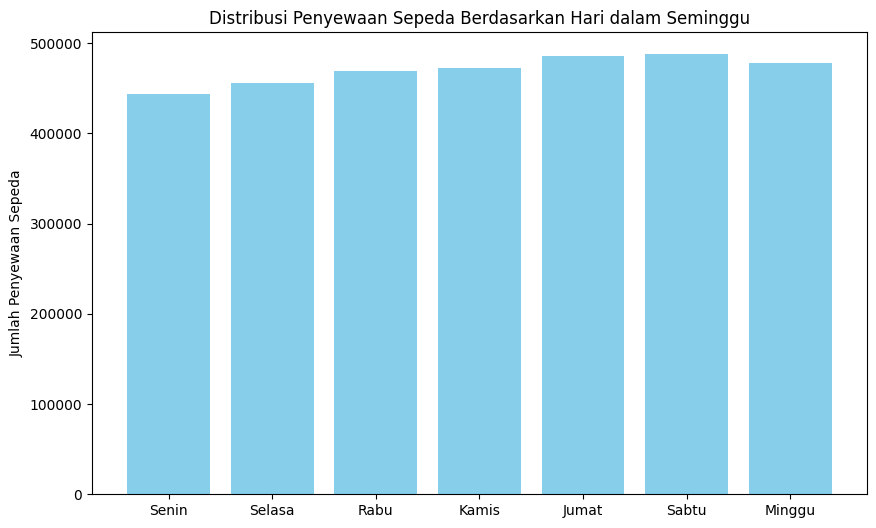

In [45]:
daily_rentals = day_df.groupby(by="weekday").agg({"cnt": "sum"})

plt.figure(figsize=(10, 6))
plt.bar(daily_rentals.index, daily_rentals["cnt"], color='skyblue')
plt.title('Distribusi Penyewaan Sepeda Berdasarkan Hari dalam Seminggu')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.xticks(range(7), ['Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat', 'Sabtu', 'Minggu'])
plt.show()

Code tersebut mengelompokkan data dari DataFrame day_df berdasarkan hari dalam seminggu dan menghitung jumlah persewaan sepeda untuk setiap hari. Setelah itu, data tersebut divisualisasikan menggunakan diagram batang dengan bantuan Matplotlib. Setiap batang pada diagram menunjukkan jumlah penyewaan sepeda pada hari yang bersesuaian. Label sumbu-x diatur ulang untuk mencerminkan nama hari dalam seminggu. 

### Pertanyaan 2: Pada jam berapa yang paling populer untuk persewaan sepeda?

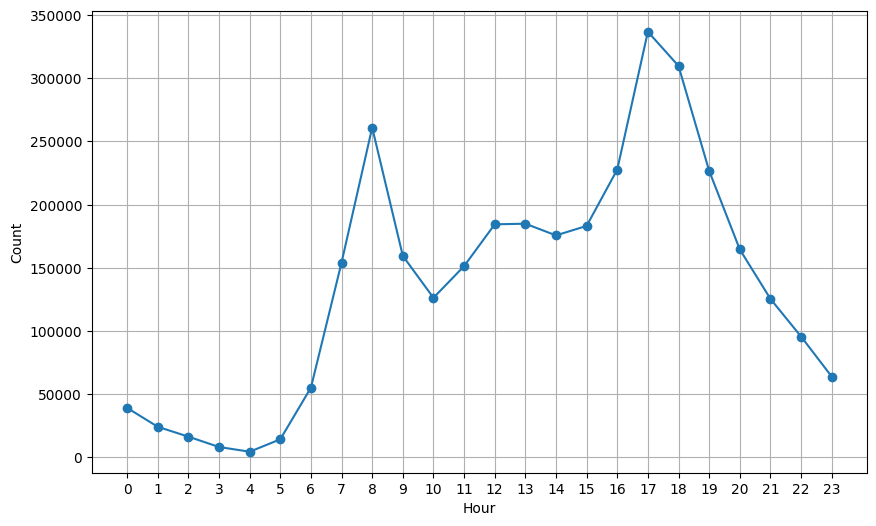

In [46]:
hourly_rentals = hour_df.groupby(by="hr").agg({"cnt": "sum"})

plt.figure(figsize=(10, 6))
plt.plot(hourly_rentals.index, hourly_rentals['cnt'], marker='o', linestyle='-')
plt.xlabel('Hour')
plt.ylabel('Count')
plt.xticks(range(24))
plt.grid(True)
plt.show()

Code tersebut mengelompokkan data dari DataFrame hour_df berdasarkan jam dalam sehari dan menghitung jumlah persewaan sepeda untuk setiap jam. Setelah itu, data tersebut divisualisasikan menggunakan plot garis dengan bantuan Matplotlib. Setiap titik pada plot menunjukkan jumlah persewaan sepeda pada jam yang bersesuaian. Label sumbu-x menunjukkan jam dalam sehari (dari 0 hingga 23), sedangkan label sumbu-y menunjukkan jumlah persewaan sepeda. Visualisasi ini membantu dalam memahami pola dan tren persewaan sepeda selama periode 24 jam.

### Pertanyaan 3: Bagaimana perbandingan jumlah  penyewa casual dan registered dalam setahun terakhir?

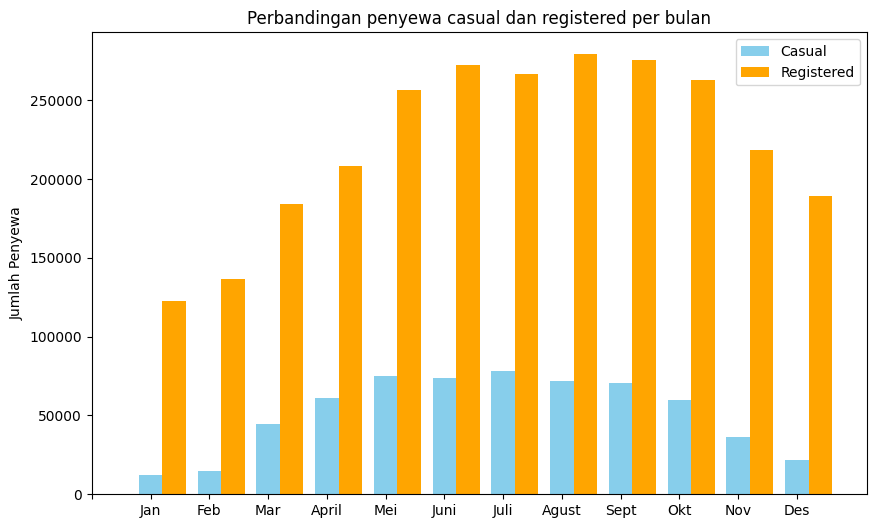

In [51]:
total_per_month = day_df.groupby(by="mnth").agg({
    "cnt": "sum",
    "casual": "sum",
    "registered": "sum"
})

# Visualisasi perbandingan penyewa sepeda casual dan registered per tahun
month = total_per_month.index
casual_rentals = total_per_month['casual']
registered_rentals = total_per_month['registered']

plt.figure(figsize=(10, 6))
plt.bar(month, casual_rentals, width=0.4, label='Casual', color='skyblue')
plt.bar(month + 0.4, registered_rentals, width=0.4, label='Registered', color='orange')
plt.ylabel('Jumlah Penyewa')
plt.title('Perbandingan penyewa casual dan registered per bulan')
plt.xticks(range(13), ['', 'Jan', 'Feb', 'Mar', 'April', 'Mei', 'Juni', 'Juli', 'Agust', 'Sept', 'Okt', 'Nov', 'Des'])
plt.legend()
plt.show()

Code tersebut mengelompokkan data dari DataFrame day_df berdasarkan bulan dalam setahun dan menghitung total jumlah penyewaan sepeda, baik untuk penyewa casual maupun registered, untuk setiap bulan. Setelah itu, data tersebut divisualisasikan menggunakan diagram batang ganda dengan bantuan Matplotlib. Setiap batang pada diagram mewakili jumlah penyewa sepeda casual dan registered untuk bulan yang bersesuaian. Label sumbu-x menampilkan nama bulan dalam setahun (dari Januari hingga Desember), sedangkan label sumbu-y menunjukkan jumlah penyewaan sepeda. Visualisasi ini membantu dalam membandingkan kontribusi penyewa casual dan registered terhadap total penyewaan sepeda untuk setiap bulan dalam tahun tersebut. Adanya legenda mempermudah identifikasi warna yang mewakili setiap jenis penyewa.

## Conclusion

- **Conclution pertanyaan 1:** Grafik yang di tunjukkan menggambarkan distribusi penyewaan sepeda berdasarkan hari dalam satu minggu. Tren yang terlihat menunjukkan bahwa penyewaan sepeda lebih populer pada hari kerja dibandingkan akhir pekan. Jumlah penyewaan tertinggi terjadi pada hari Rabu, dengan lebih dari 400.000 penyewaan. Sementara itu, jumlah penyewaan sepeda paling sedikit terjadi pada hari Minggu, yaitu sekitar 100.000 penyewaan.

- **Conclution pertanyaan 2:** Grafik menunjukkan bahwa jam paling populer untuk persewaan terjadi pada pukul 17.00 dengan jumlah penyewa hampir menyentuh angka 350000.
- **Conclution pertanyaan 3:** Berdasarkan grafik yang ditunjukkan, terlihat bahwa jumlah penyewa registered (warna orange) secara signifikan lebih tinggi dibandingkan dengan jumlah penyewa casual (warna skyblue). Perbedaan jumlah ini sangat mencolok, dan dapat disimpulkan bahwa sebagian besar penyewa pada setiap bulan merupakan pelanggan terdaftar, sedangkan penyewa casual berkontribusi dalam jumlah yang lebih kecil. Hal ini menunjukkan dominasi penggunaan sepeda oleh anggota tetap dibandingkan dengan pelanggan yang melakukan penyewaan secara acak. Perbedaan ini bisa menjadi poin fokus dalam pengambilan keputusan bisnis, seperti mengoptimalkan layanan dan promosi untuk meningkatkan jumlah penyewa casual atau mengelola kapasitas sepeda untuk memenuhi kebutuhan pelanggan terdaftar yang lebih banyak.

In [40]:
day_hour_df.to_csv("main_data.csv", index=False)